In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
myfolder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/neuroseq_notebooks/"

In [3]:
file_df = pd.read_csv(myfolder+'/file_tracking.tsv', sep='\t', index_col=0)

file_df

,type,time_point,description,path
label,,,,
all_sample_h5,scanpy h5 file,all,Scanpy file with subsample of cells from all t...,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_h5,scanpy h5 file,D11,scanpy file with all D11 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_h5,scanpy h5 file,D30,scanpy file with all D30 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_h5,scanpy h5 file,D52,scanpy file with all D52 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_cell_fractions,tsv,D11,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_cell_fractions,tsv,D30,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_cell_fractions,tsv,D52,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_efficiency,tsv,D52,differentiation efficiency for each cell line,/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_trajectories,tsv,all,"all differentiation trajectories, restricted t...",/nfs/leia/research/stegle/dseaton/hipsci/singl...


In [4]:
file = file_df.loc['all_sample_h5','path']

adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [5]:
adatafull.obs

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
TTCCCAGGTTCCATGA-1-0,0,HPSI0214i-eiwy_1,7.893572,9.321613,4.077538,2679,53.543307,63.842162,74.865784,37.687903,0.518969,5245STDY7352549,11176.0,58.0,3,D11,pool1,NONE,11176.0,FPP
AACCGCGAGGTCATCT-1-0,0,HPSI0114i-eipl_1,8.214194,9.801510,5.147494,3692,51.971207,61.666667,72.530454,37.308970,0.946844,5245STDY7352549,18060.0,171.0,5,D11,pool1,NONE,18060.0,P_FPP
TCACAAGTCTTATCTG-1-0,0,HPSI1113i-podx_1,8.319474,10.024244,5.318120,4102,51.511123,61.176106,71.900204,36.860764,0.899583,5245STDY7352549,22566.0,203.0,5,D11,pool1,NONE,22566.0,P_FPP
TACCTTACACGGTTTA-1-0,0,HPSI0614i-liqa_1,7.825245,9.297252,4.744932,2502,58.595397,67.717979,77.775740,42.917393,1.045200,5245STDY7352549,10907.0,114.0,3,D11,pool1,NONE,10907.0,FPP
CCTAGCTAGCGCCTTG-1-0,0,HPSI0114i-eipl_1,8.029433,9.451638,4.718499,3069,50.487115,60.402263,71.763042,36.635764,0.872093,5245STDY7352549,12728.0,111.0,5,D11,pool1,NONE,12728.0,P_FPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGCATCTCAACGCTA-1-150,150,HPSI1113i-qorq_1,8.315322,9.783182,6.086775,4085,37.074216,48.325062,63.489736,28.270923,2.475750,5245STDY8354286,17732.0,439.0,2,D52,pool17,ROT,17732.0,Sert
GGCCGATGTGTCCTCT-1-150,150,HPSI0115i-jotn_2,8.343554,9.910066,6.824374,4202,42.933784,53.519448,67.815806,34.454324,4.565098,5245STDY8354286,20131.0,919.0,2,D52,pool17,ROT,20131.0,Sert
GCGCAGTTCACGAAGG-1-150,150,HPSI0114i-vass_1,8.341649,10.012028,6.922644,4194,40.848735,51.157366,66.781805,33.316885,4.548717,5245STDY8354286,22292.0,1014.0,2,D52,pool17,ROT,22292.0,Sert


In [6]:
adatafull.n_obs

205416

In [7]:
adatafull.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
TTCCCAGGTTCCATGA-1-0,0,HPSI0214i-eiwy_1,7.893572,9.321613,4.077538,2679,53.543307,63.842162,74.865784,37.687903,0.518969,5245STDY7352549,11176.0,58.0,3,D11,pool1,NONE,11176.0,FPP
AACCGCGAGGTCATCT-1-0,0,HPSI0114i-eipl_1,8.214194,9.801510,5.147494,3692,51.971207,61.666667,72.530454,37.308970,0.946844,5245STDY7352549,18060.0,171.0,5,D11,pool1,NONE,18060.0,P_FPP
TCACAAGTCTTATCTG-1-0,0,HPSI1113i-podx_1,8.319474,10.024244,5.318120,4102,51.511123,61.176106,71.900204,36.860764,0.899583,5245STDY7352549,22566.0,203.0,5,D11,pool1,NONE,22566.0,P_FPP
TACCTTACACGGTTTA-1-0,0,HPSI0614i-liqa_1,7.825245,9.297252,4.744932,2502,58.595397,67.717979,77.775740,42.917393,1.045200,5245STDY7352549,10907.0,114.0,3,D11,pool1,NONE,10907.0,FPP
CCTAGCTAGCGCCTTG-1-0,0,HPSI0114i-eipl_1,8.029433,9.451638,4.718499,3069,50.487115,60.402263,71.763042,36.635764,0.872093,5245STDY7352549,12728.0,111.0,5,D11,pool1,NONE,12728.0,P_FPP


In [8]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [9]:
adata.n_obs

205416

In [10]:
adata.obs

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
ATCGAGTTCAAACGGG-1-60,60,HPSI0514i-fiaj_1,8.347827,9.487972,5.998937,4220,29.721949,38.366543,53.488901,22.880521,3.045685,5245STDY7631342,13199.0,402.0,1,D52,pool5,NONE,13199.0,DA
ACCAGTAAGACCTAGG-1-81,81,HPSI0115i-aoxv_1,8.043984,9.088625,5.181784,3114,34.745284,45.882752,60.747769,24.082232,1.999322,5245STDY7654676,8853.0,177.0,0,D30,pool8,NONE,8853.0,Astro
GCTGCAGCAACCGCCA-1-46,46,HPSI0214i-poih_2,6.579251,7.176255,2.890372,719,44.070390,59.831676,83.244070,31.752104,1.300689,5245STDY7603455,1307.0,17.0,1,D30,pool5,NONE,1307.0,DA
AACTCCCTCGACAGCC-1-66,66,HPSI0414i-mita_1,7.980024,9.723763,5.087596,2921,58.686935,68.406248,78.795859,42.617751,0.963553,5245STDY7632692,16709.0,161.0,5,D11,pool6,NONE,16709.0,P_FPP
CGTCCATGTAGGCTGA-1-53,53,HPSI0115i-paim_1,7.807103,9.137662,4.969813,2457,52.645730,61.916541,74.166487,38.137234,1.537965,5245STDY7631335,9298.0,143.0,4,D52,pool1,NONE,9298.0,FPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTTAGTCTTCGGTC-1-123,123,HPSI0513i-sucd_3,6.546785,6.841616,4.499810,696,35.828877,46.951872,79.037433,25.133690,9.518717,5245STDY7878552,935.0,89.0,7,D11,pool11,NONE,935.0,FPP
TGAGGGAGTACCCAAT-1-79,79,HPSI0414i-mita_1,8.063378,9.085910,5.105946,3175,36.787858,46.777665,60.380564,26.446936,1.857515,5245STDY7654674,8829.0,164.0,7,D30,pool6,NONE,8829.0,Astro
TCAGATGCATGACGGA-1-120,120,HPSI1113i-hayt_3,7.909122,9.296977,5.442418,2721,50.091709,60.409024,72.551357,37.133162,2.109318,5245STDY7741874,10904.0,230.0,4,D52,pool9,ROT,10904.0,FPP


In [11]:
adata.n_vars

32738

In [12]:
# try to store celltype as categorical with different ordering
celltype_ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]

cat_type = pd.CategoricalDtype(categories=celltype_ordering,ordered=True)

adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

In [13]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [14]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adata.obs['celltype_timepoint_new'] = (
    adata.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [15]:
# adata.obs['celltype_timepoint_new']

In [16]:
# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","Astro", "Epen1","Epen2","Sert","P_Sert","DA","U_Neur1","U_Neur2","U_Neur3"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]


cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint_new'] = adata.obs['celltype_timepoint_new'].astype(cat_type)

... storing 'celltype_timepoint' as categorical


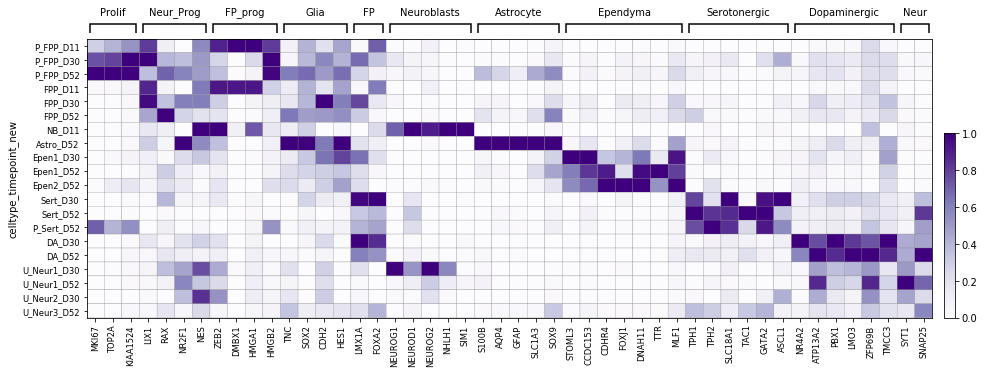

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[15.36, 0, 0.2])

In [17]:
Proliferating = ['MKI67', 'TOP2A', 'KIAA1524']
Neural_Prog = ['LIX1', 'RAX', 'NR2F1', 'NES',]
FP_prog = ['ZEB2', 'DMBX1','HMGA1', 'HMGB2']
Glia = ['TNC', 'SOX2', 'CDH2', 'HES1']
FP = ['LMX1A', 'FOXA2']
Astrocytes = ['S100B', 'AQP4', 'GFAP', 'SLC1A3','SOX9']
Ependyma = ['STOML3','CCDC153','CDHR4','FOXJ1','DNAH11',  'TTR','MLF1']
Serotonergic = ['TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1']
Dopaminergic = ['NR4A2', 'ATP13A2', 'PBX1', 'LMO3',  'ZFP69B', 'TMCC3']
Neuron = ['SYT1', 'SNAP25']
Neuroblasts = ['NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1']

var_group_positions=[(0,2), (3,6), (7, 10),(11,14),(15,16),(17,21),(22,26),(27,33),(34,39),(40,45),(46,47)]
var_group_labels=['Prolif','Neur_Prog', 'FP_prog','Glia','FP','Neuroblasts',
                  'Astrocyte','Ependyma','Serotonergic','Dopaminergic','Neur']

gene_list = Proliferating+Neural_Prog+FP_prog+Glia+FP+Neuroblasts+Astrocytes+Ependyma+Serotonergic+Dopaminergic+Neuron    

sc.pl.matrixplot(adata, var_names=gene_list,
                 groupby='celltype_timepoint_new', standard_scale='var', cmap='Purples',
                 var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                 var_group_rotation=0)

In [18]:
adata.obs['celltype_timepoint_new_treatment'] = (adata.obs.apply(lambda x: x['celltype_timepoint_new']+'_'+x['treatment'], axis=1))

In [19]:
adata.obs

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,...,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,celltype_timepoint,celltype_timepoint_new,celltype_timepoint_new_treatment
index,,,,,,,,,,,,,,,,,,,,,
ATCGAGTTCAAACGGG-1-60,60,HPSI0514i-fiaj_1,8.347827,9.487972,5.998937,4220,29.721949,38.366543,53.488901,22.880521,...,402.0,1,D52,pool5,NONE,13199.0,DA,DA_D52,DA_D52,DA_D52_NONE
ACCAGTAAGACCTAGG-1-81,81,HPSI0115i-aoxv_1,8.043984,9.088625,5.181784,3114,34.745284,45.882752,60.747769,24.082232,...,177.0,0,D30,pool8,NONE,8853.0,Astro,Astro_D30,FPP_D30,FPP_D30_NONE
GCTGCAGCAACCGCCA-1-46,46,HPSI0214i-poih_2,6.579251,7.176255,2.890372,719,44.070390,59.831676,83.244070,31.752104,...,17.0,1,D30,pool5,NONE,1307.0,DA,DA_D30,DA_D30,DA_D30_NONE
AACTCCCTCGACAGCC-1-66,66,HPSI0414i-mita_1,7.980024,9.723763,5.087596,2921,58.686935,68.406248,78.795859,42.617751,...,161.0,5,D11,pool6,NONE,16709.0,P_FPP,P_FPP_D11,P_FPP_D11,P_FPP_D11_NONE
CGTCCATGTAGGCTGA-1-53,53,HPSI0115i-paim_1,7.807103,9.137662,4.969813,2457,52.645730,61.916541,74.166487,38.137234,...,143.0,4,D52,pool1,NONE,9298.0,FPP,FPP_D52,FPP_D52,FPP_D52_NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTTAGTCTTCGGTC-1-123,123,HPSI0513i-sucd_3,6.546785,6.841616,4.499810,696,35.828877,46.951872,79.037433,25.133690,...,89.0,7,D11,pool11,NONE,935.0,FPP,FPP_D11,FPP_D11,FPP_D11_NONE
TGAGGGAGTACCCAAT-1-79,79,HPSI0414i-mita_1,8.063378,9.085910,5.105946,3175,36.787858,46.777665,60.380564,26.446936,...,164.0,7,D30,pool6,NONE,8829.0,Astro,Astro_D30,FPP_D30,FPP_D30_NONE
TCAGATGCATGACGGA-1-120,120,HPSI1113i-hayt_3,7.909122,9.296977,5.442418,2721,50.091709,60.409024,72.551357,37.133162,...,230.0,4,D52,pool9,ROT,10904.0,FPP,FPP_D52,FPP_D52,FPP_D52_ROT


In [20]:
ordering = ["P_FPP","FPP","NB","Astro", "Epen1","Epen2","Sert","P_Sert","DA","U_Neur1","U_Neur2","U_Neur3"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]
ordering = [x+'_'+y for x in ordering for y in ['NONE','ROT']]

In [21]:
cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint_new_treatment'] = adata.obs['celltype_timepoint_new_treatment'].astype(cat_type)

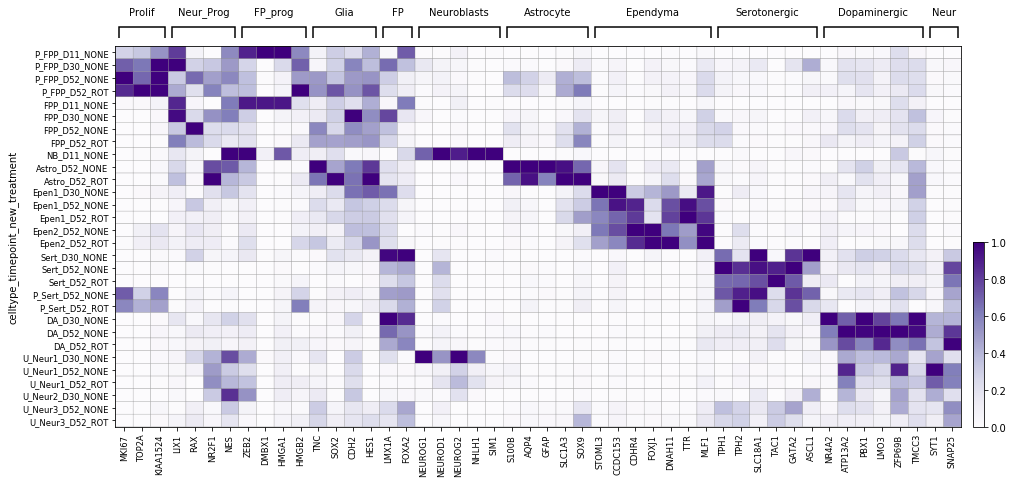

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[15.36, 0, 0.2])

In [22]:
sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',
                    var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)